In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

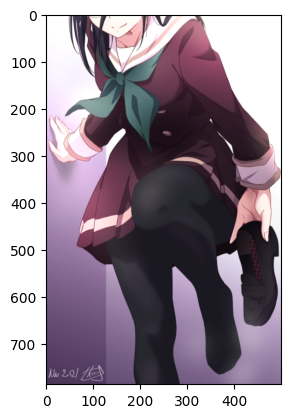

In [5]:
image = cv2.imread("../images/94147214_p0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# warpPerspective 透射变换

透射变换是视角变化的结果，是指利用透视中心、像点、目标点三点共线的条件，
按透视旋转定律使承影面（透视面）绕迹线（透视轴）旋转某一角度，破坏原有的投影光线束，
仍能保持承影面上投影几何图形不变的变换。

在opencv中，我们要找到四个点，其中任意三个不共线，然后获取变换矩阵T，再进行透射变换。
通过函数cv.getPerspectiveTransform找到变换矩阵，将cv.warpPerspective应用于此3x3变换矩阵。

In [ ]:
## getPerspectiveTransform 获取投射变换矩阵

In [6]:
M = cv2.getPerspectiveTransform(
    src=np.float32([[56, 65], [368, 52], [28, 387], [389, 390]]),
    dst=np.float32([[100, 145], [300, 100], [80, 290], [310, 300]])
)
M

array([[ 3.98327670e-01, -2.09876559e-02,  7.49460064e+01],
       [-1.92233080e-01,  4.29335771e-01,  1.21896057e+02],
       [-7.18774228e-04, -1.33393850e-05,  1.00000000e+00]])

In [8]:
h, w, c = image.shape
h, w, c

(787, 500, 3)

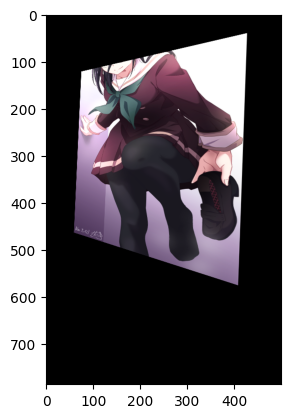

In [9]:

image1 = cv2.warpPerspective(
    src=image,
    M=M,                            # 变换矩阵
    dsize=[w, h],                   # 目标大小
    flags=cv2.INTER_CUBIC,          # 差值算法 INTER_LINEAR, INTER_NEAREST, INTER_AREA, INTER_CUBIC, INTER_LANCZOS4
    borderMode=cv2.BORDER_CONSTANT, # 边缘
    borderValue=(0, 0, 0)
)
plt.imshow(image1)